In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import os


Bad key "axes.titlelocation" on line 10 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key "axes.titlecolor" on line 13 in
C:\Users\gon2gon2\.matplotlib\stylelib\mystyle.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
os.getcwd()

'c:\\kaggle\\KaKr_4th'

In [3]:
path = './data'
f_list = os.listdir(path)
print(f_list)

['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
train = pd.read_csv(os.path.join(path,f_list[2]))
test = pd.read_csv(os.path.join(path,f_list[1]))
sample = pd.read_csv(os.path.join(path,f_list[0]))

In [5]:
display(train.head())
display(test.head())

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [6]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


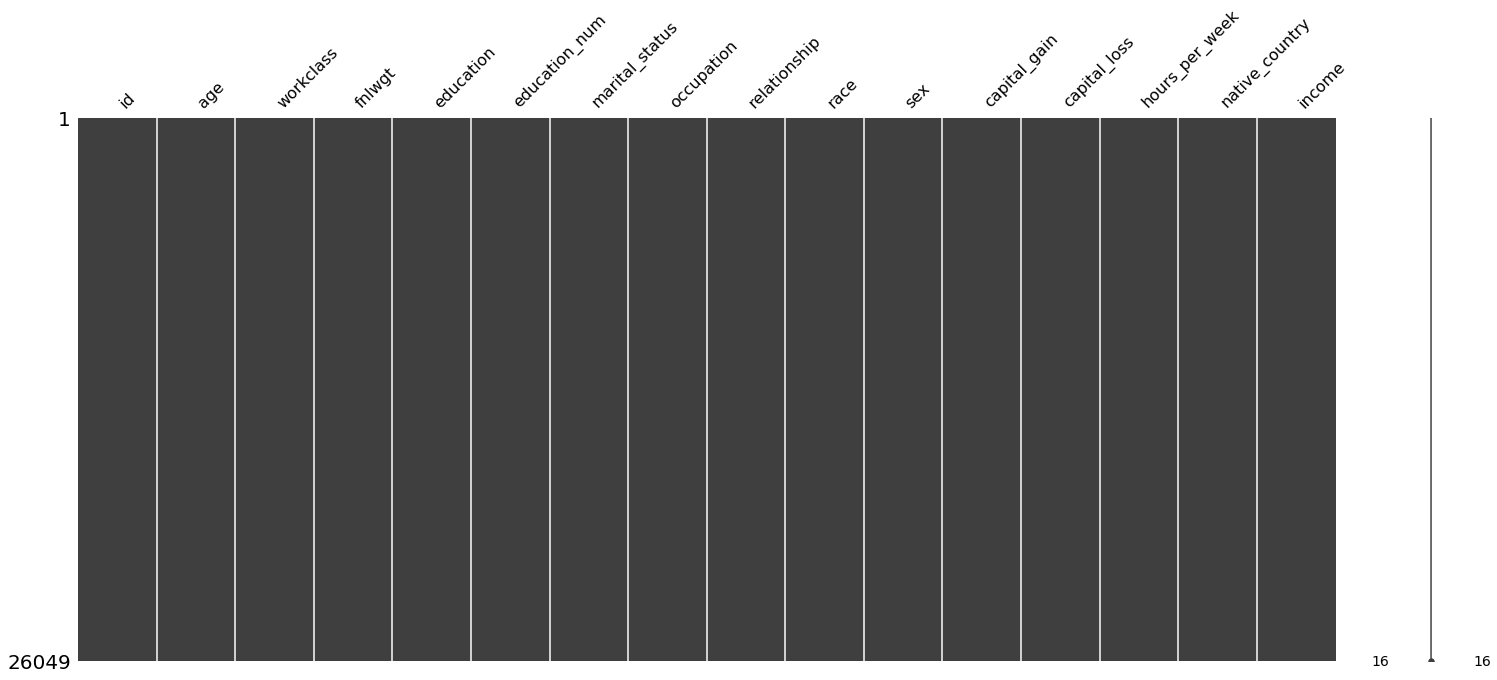

In [8]:
msno.matrix(train)

In [9]:
type(train['income'][1])

str

In [10]:
train.loc[train['income']=='>50K', 'income'] = 1
train.loc[train['income']=='<=50K', 'income'] = 0

In [ ]:
# 다른 방법 1
train.income.map(lambda x: int(x=='>50k'))
# 다른 방법 2
label = label.map(lambda x: 1 if x == '>50K' else 0)

In [11]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [16]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


# 1. Age
### 나이를 구간별로 나눠서 생각해보자구
1. ~33
2. 34~47
3. 48~55
4. 56~62
5. 63~

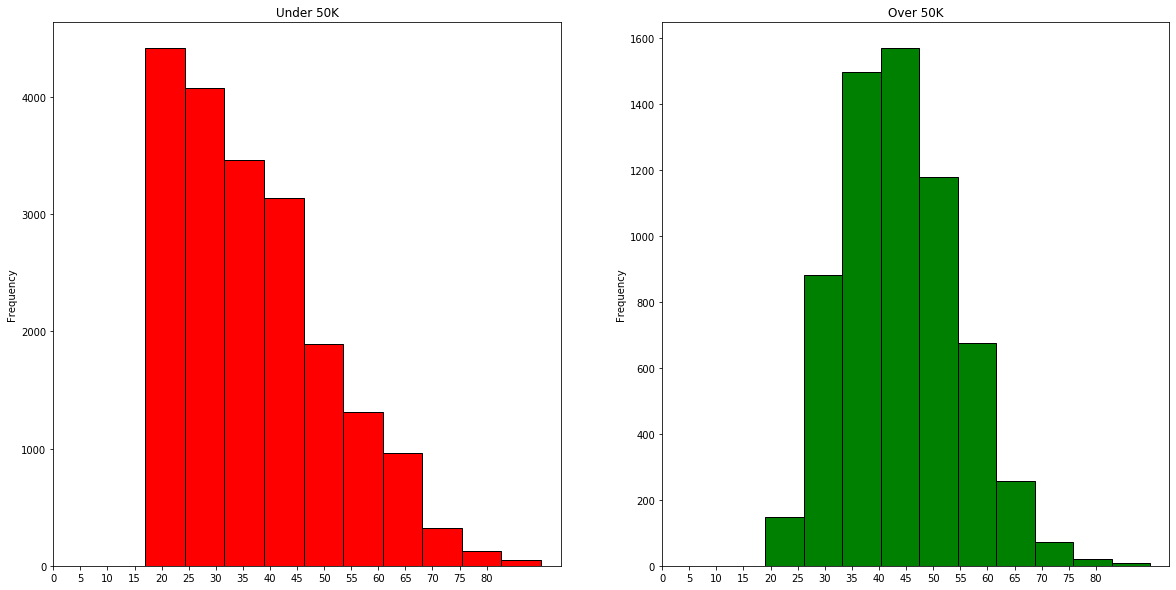

In [27]:
f,ax = plt.subplots(1,2,figsize=(20,10))
train[train['income']==0].age.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='red')
ax[0].set_title('Under 50K')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['income']==1].age.plot.hist(ax=ax[1],color='green', bins=10, edgecolor='black')
ax[1].set_title('Over 50K')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [30]:
train.loc[train['age']<=33,'age'] = 1
train.loc[(train['age']>=34)&(train['age']<=47),'age'] = 2
train.loc[(train['age']>=48)&(train['age']<=55),'age'] = 3
train.loc[(train['age']>=56)&(train['age']<=62),'age'] = 4
train.loc[train['age']>=63,'age'] = 5

In [32]:
train['age'].value_counts()

1    10570
2     8935
3     3270
4     1835
5     1439
Name: age, dtype: int64

In [58]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [59]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [60]:
train.describe().columns

Index(['id', 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [61]:
set(train.columns).difference(set(train.describe().columns))

{'education',
 'income',
 'marital_status',
 'native_country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass'}

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [63]:
train['education'].value_counts()

HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64

# Education
- HS-grad         8433
- Some-college    5800
- Bachelors       4344
- Masters         1378
- Assoc-voc       1096
- 11th             922
- Assoc-acdm       842
- 10th             731
- 7th-8th          505
- Prof-school      466
- 9th              418
- 12th             359
- Doctorate        316
- 5th-6th          265
- 1st-4th          134
- Preschool         40

In [34]:
edu = list(train['education'].values)

In [65]:
print(edu)

['HS-grad', '9th', 'Some-college', 'Some-college', 'Some-college', 'HS-grad', 'Bachelors', '11th', 'HS-grad', 'Some-college', '1st-4th', 'Some-college', 'Some-college', '11th', '5th-6th', 'HS-grad', 'Bachelors', 'HS-grad', 'Bachelors', 'Bachelors', 'Assoc-acdm', 'Bachelors', '10th', 'Assoc-acdm', 'HS-grad', 'HS-grad', 'HS-grad', 'HS-grad', 'Bachelors', 'Bachelors', 'Some-college', 'HS-grad', '5th-6th', 'Some-college', 'HS-grad', '5th-6th', 'Some-college', '10th', '1st-4th', 'Prof-school', '11th', '9th', 'Bachelors', '7th-8th', 'HS-grad', 'Some-college', 'HS-grad', 'Bachelors', 'Masters', 'Some-college', 'Bachelors', 'Bachelors', 'Assoc-voc', 'Prof-school', 'Bachelors', 'HS-grad', 'Doctorate', 'HS-grad', 'Bachelors', 'Bachelors', 'Assoc-voc', 'Masters', 'HS-grad', 'Assoc-acdm', '9th', 'Masters', 'HS-grad', 'HS-grad', 'Bachelors', 'HS-grad', 'Bachelors', 'Some-college', 'Some-college', '11th', 'HS-grad', 'Bachelors', 'Some-college', 'HS-grad', 'Some-college', 'Some-college', 'HS-grad', '

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 데이터에서 특징 찾기(범주의 수
le.fit(edu)

#데이터 변환
train['education'] = le.transform(train['education'])

In [36]:
def to_cat(label,data):
  le = LabelEncoder()
  val = list(data[label].values)
  le.fit(val)
  data[label] = le.transform(data[label])

In [37]:
for i in [train, test]:
  for j in ['marital_status', 'native_country', 'occupation', 'race', 'relationship', 'sex', 'workclass']:
    to_cat(j,i)

In [38]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,2,4,168538,11,9,2,12,0,4,1,0,0,60,38,1
1,1,1,4,101626,6,5,4,7,3,4,1,0,0,20,38,0
2,2,1,4,353358,15,10,4,8,3,4,1,0,0,16,38,0
3,3,1,4,151158,15,10,4,10,3,4,0,0,0,25,38,0
4,4,1,4,122234,15,10,4,1,1,2,0,0,0,20,0,0


In [39]:
le.classes_

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype='<U12')

In [40]:
train['workclass'].value_counts()

4    18123
6     2030
2     1692
0     1502
7     1043
5      877
1      765
8       11
3        6
Name: workclass, dtype: int64

In [41]:
y = train.pop('income')

In [42]:
train_id = train.pop('id')
test_id = test.pop('id')

In [43]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,28,4,67661,Some-college,10,4,1,2,4,0,0,0,40,39
1,40,5,37869,HS-grad,9,2,4,0,4,1,0,0,50,39
2,20,4,109952,Some-college,10,4,6,3,4,1,0,0,25,39
3,40,4,114537,Assoc-voc,11,2,4,0,4,1,0,0,50,39
4,37,4,51264,Doctorate,16,2,10,0,4,1,0,0,99,10


In [44]:
to_cat('education',test)

In [46]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,tree_method='gpu_hist')
xgb.fit(train,y)
pred = xgb.predict(test)

In [47]:
sample.head()

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [51]:
(pd.DataFrame({'id':range(len(pred)),'prediction':pred})).to_csv('age.csv',index=False)

In [89]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
params = {
        'n_estimators' : [300,400,500,600,700,800],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier()

grd = GridSearchCV(xgb, param_grid = params, cv=4, refit=True)

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             26049 non-null  int64
 1   workclass       26049 non-null  int64
 2   fnlwgt          26049 non-null  int64
 3   education       26049 non-null  int64
 4   education_num   26049 non-null  int64
 5   marital_status  26049 non-null  int64
 6   occupation      26049 non-null  int64
 7   relationship    26049 non-null  int64
 8   race            26049 non-null  int64
 9   sex             26049 non-null  int64
 10  capital_gain    26049 non-null  int64
 11  capital_loss    26049 non-null  int64
 12  hours_per_week  26049 non-null  int64
 13  native_country  26049 non-null  int64
dtypes: int64(14)
memory usage: 2.8 MB


In [81]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,40,4,168538,11,9,2,12,0,4,1,0,0,60,38
1,17,4,101626,6,5,4,7,3,4,1,0,0,20,38
2,18,4,353358,15,10,4,8,3,4,1,0,0,16,38
3,21,4,151158,15,10,4,10,3,4,0,0,0,25,38
4,24,4,122234,15,10,4,1,1,2,0,0,0,20,0


In [83]:
type(y[1])

int

In [87]:
y = np.array(y)

In [85]:
y.value_counts()

0    19744
1     6305
Name: income, dtype: int64

In [90]:
grd.fit(train,y)

ValueError: ignored

In [ ]:
# from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1)
xgb.fit(train,y)
pred = xgb.predict(test)

In [ ]:
sample.head()

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
prd = pd.DataFrame({'id':range(len(pred)),'prediction':pred})

In [ ]:
prd.to_csv('first.csv',index=False)

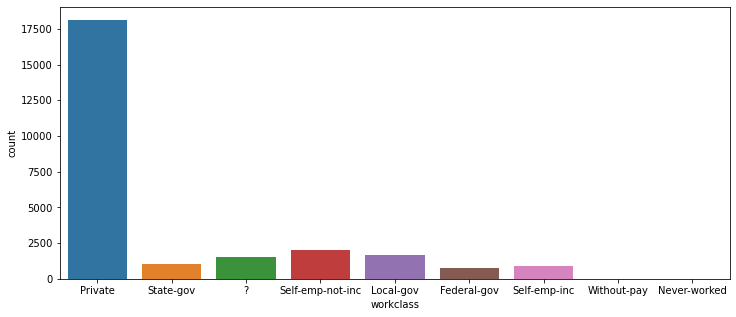

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='workclass')
plt.show()

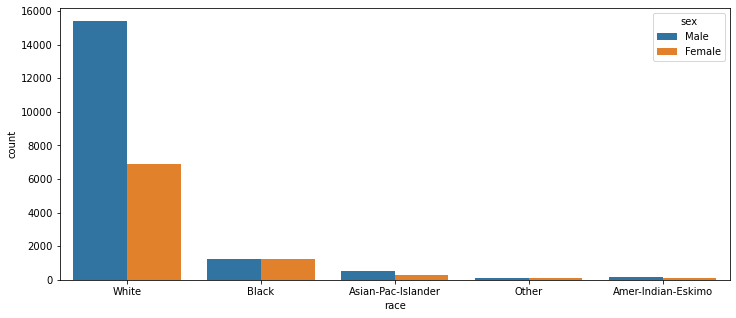

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.countplot(data=train, x='race',hue='sex')   # hue 색상
plt.show()

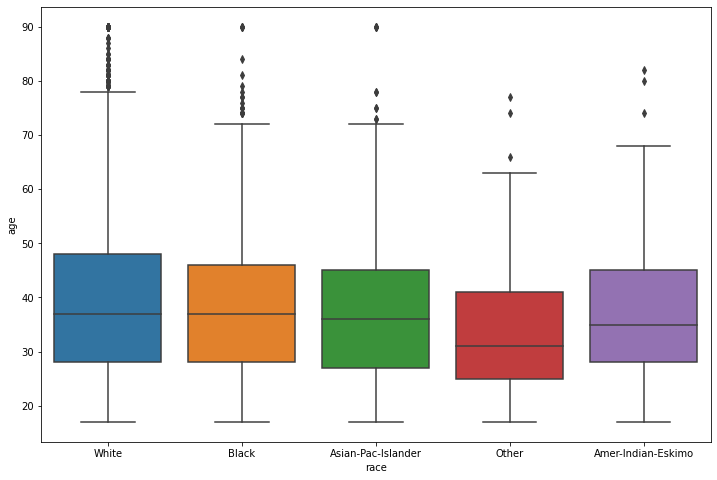

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=train, x='race',y = 'age')
plt.show()

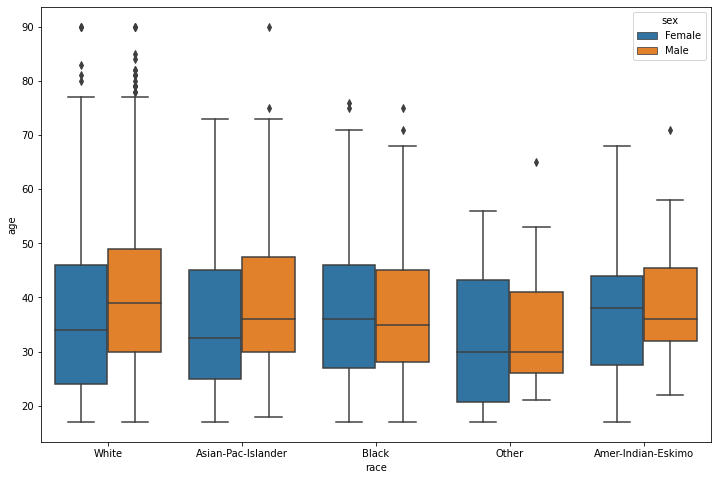

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.boxplot(data=test, x='race',y = 'age',hue='sex')
plt.show()

In [ ]:
corr = train.corr()

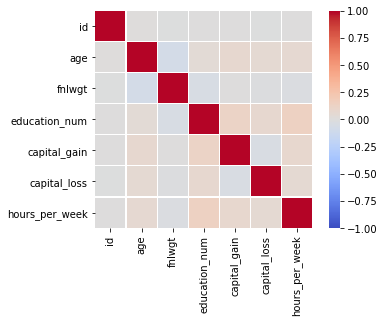

In [ ]:
sns.heatmap(corr, square=True, linewidth=0.1, cmap='coolwarm',
           vmax=1.0, vmin=-1.0)

In [ ]:
!pip install dabl

     |████████████████████████████████| 566 kB 585 kB/s eta 0:00:01
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=c6e25aed768ddedc7840fefb18e9779890fe3254ea4bbc723805f30cba0ef7eb
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


In [ ]:
import dabl
dabl.detect_types(train,target_col='income')

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
id,False,False,False,False,False,False,True
age,False,False,True,False,False,False,False
workclass,False,False,False,True,False,False,False
fnlwgt,True,False,False,False,False,False,False
education,False,False,False,True,False,False,False
education_num,False,False,True,False,False,False,False
marital_status,False,False,False,True,False,False,False
occupation,False,False,False,True,False,False,False
relationship,False,False,False,True,False,False,False
race,False,False,False,True,False,False,False


In [ ]:
types = dabl.detect_types(train,target_col='income')

In [ ]:
print('#####categorical values#####')
for i in type.loc(types['categorical']==True):
    print(i,end=',')

#####categorical values#####


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
ttt = types[types['categorical']==True].iloc[:,:0]
types[types['categorical']==True].iloc[:,:0]

""
workclass
education
marital_status
occupation
relationship
race
sex
native_country
income


In [ ]:
for i in ttt.index:
    print(i)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [ ]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
